Epoch 1, Loss: 0.7879
Epoch 2, Loss: 0.5705
Epoch 3, Loss: 0.5255
Epoch 4, Loss: 0.5011
Epoch 5, Loss: 0.4857
Epoch 6, Loss: 0.4747
Epoch 7, Loss: 0.4650
Epoch 8, Loss: 0.4585
Epoch 9, Loss: 0.4527
Epoch 10, Loss: 0.4465
Test Accuracy: 0.827


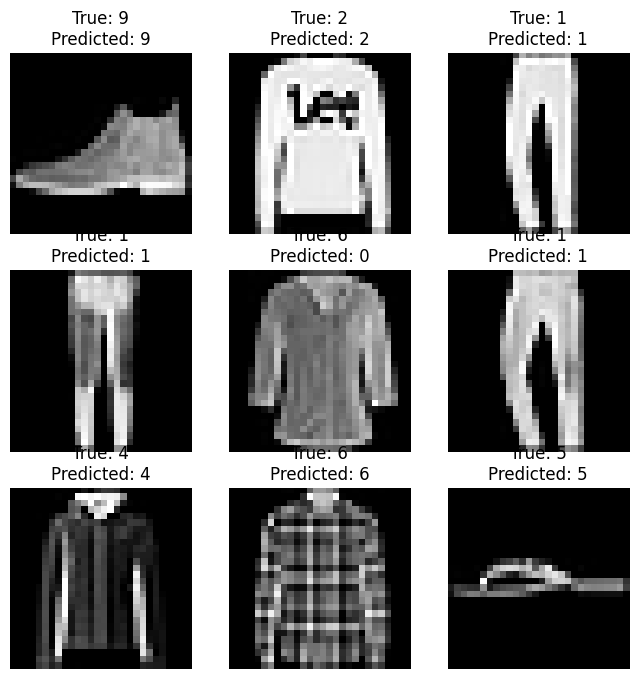

In [2]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# Helper function to load Fashion MNIST dataset
def load_data_fashion_mnist(batch_size, resize=None):
    trans = [transforms.ToTensor()]
    if resize:
        trans.insert(0, transforms.Resize(resize))
    trans = transforms.Compose(trans)

    mnist_train = datasets.FashionMNIST(root="./data", train=True, transform=trans, download=True)
    mnist_test = datasets.FashionMNIST(root="./data", train=False, transform=trans, download=True)

    return (
        torch.utils.data.DataLoader(mnist_train, batch_size=batch_size, shuffle=True),
        torch.utils.data.DataLoader(mnist_test, batch_size=batch_size, shuffle=False)
    )

# Define the neural network model
class FashionMNISTModel(nn.Module):
    def __init__(self):
        super(FashionMNISTModel, self).__init__()
        self.flatten = nn.Flatten()
        self.linear = nn.Linear(28*28, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = self.linear(x)
        return x

# Load Fashion MNIST data
batch_size = 256
train_loader, test_loader = load_data_fashion_mnist(batch_size)

# Initialize model and move to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = FashionMNISTModel().to(device)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

# Training loop
def train(model, train_loader, criterion, optimizer, num_epochs):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * images.size(0)
        epoch_loss = running_loss / len(train_loader.dataset)
        print(f"Epoch {epoch + 1}, Loss: {epoch_loss:.4f}")

# Evaluation function
def evaluate(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = correct / total
    print(f"Test Accuracy: {accuracy:.3f}")

# Train the model
num_epochs = 10
train(model, train_loader, criterion, optimizer, num_epochs)

# Evaluate the model on test data
evaluate(model, test_loader)

# Prediction function
def predict(model, test_loader):
    model.eval()
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            break

    # Display a sample of predictions
    fig, axes = plt.subplots(3, 3, figsize=(8, 8))
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i].cpu().numpy().squeeze(), cmap="gray")
        ax.set_title(f"True: {labels[i].item()}\nPredicted: {predicted[i].item()}")
        ax.axis("off")
    plt.show()

# Make predictions using the model
predict(model, test_loader)


In [1]:
import torch
from torchvision import datasets, transforms

def load_data_fashion_mnist(batch_size, resize=None):
    # 定义数据预处理操作
    trans = [transforms.ToTensor()]
    if resize:
        trans.insert(0, transforms.Resize(resize))
    trans = transforms.Compose(trans)

    # 加载训练集和测试集
    mnist_train = datasets.FashionMNIST(root="./data", train=True, transform=trans, download=True)
    mnist_test = datasets.FashionMNIST(root="./data", train=False, transform=trans, download=True)

    # 创建 DataLoader
    train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=batch_size, shuffle=True)
    test_loader = torch.utils.data.DataLoader(mnist_test, batch_size=batch_size, shuffle=False)

    return train_loader, test_loader


In [2]:
import torch
from torch import nn

class FashionMNISTModel(nn.Module):
    def __init__(self):
        super(FashionMNISTModel, self).__init__()
        self.flatten = nn.Flatten()
        self.linear = nn.Linear(28*28, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = self.linear(x)
        return x


In [6]:
import torch

# Train the model with loss curve, train accuracy, and test accuracy visualization
def train(model, train_loader, criterion, optimizer, num_epochs):
    model.train()
    train_losses = []
    train_accuracies = []
    for epoch in range(num_epochs):
        running_loss = 0.0
        correct = 0
        total = 0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * images.size(0)
            
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        epoch_loss = running_loss / len(train_loader.dataset)
        train_losses.append(epoch_loss)
        train_accuracy = correct / total
        train_accuracies.append(train_accuracy)
        
        print(f"Epoch {epoch + 1}, Loss: {epoch_loss:.4f}, Train Accuracy: {train_accuracy:.4f}")

    # Plot the training loss curve and train accuracy curve
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
    plt.title('Training Loss over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(1, num_epochs + 1), train_accuracies, label='Training Accuracy', color='orange')
    plt.title('Training Accuracy over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()


def evaluate(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = correct / total
    print(f"Test Accuracy: {accuracy:.3f}")


In [7]:
import matplotlib.pyplot as plt

def predict(model, test_loader):
    model.eval()
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            break

    # 显示部分预测结果
    fig, axes = plt.subplots(3, 3, figsize=(8, 8))
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i].cpu().numpy().squeeze(), cmap="gray")
        ax.set_title(f"True: {labels[i].item()}\nPredicted: {predicted[i].item()}")
        ax.axis("off")
    plt.show()


Epoch 1, Loss: 0.7814, Train Accuracy: 0.7559
Epoch 2, Loss: 0.5706, Train Accuracy: 0.8135
Epoch 3, Loss: 0.5269, Train Accuracy: 0.8247
Epoch 4, Loss: 0.5020, Train Accuracy: 0.8315
Epoch 5, Loss: 0.4856, Train Accuracy: 0.8368
Epoch 6, Loss: 0.4743, Train Accuracy: 0.8397
Epoch 7, Loss: 0.4658, Train Accuracy: 0.8425
Epoch 8, Loss: 0.4592, Train Accuracy: 0.8438
Epoch 9, Loss: 0.4522, Train Accuracy: 0.8463
Epoch 10, Loss: 0.4471, Train Accuracy: 0.8476


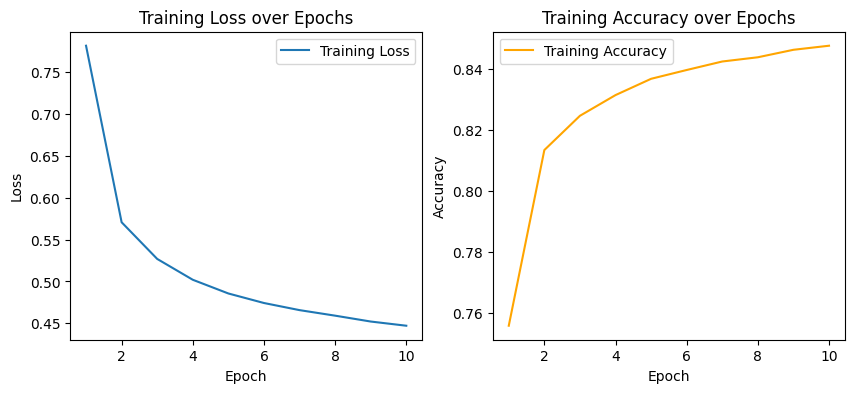

Test Accuracy: 0.828


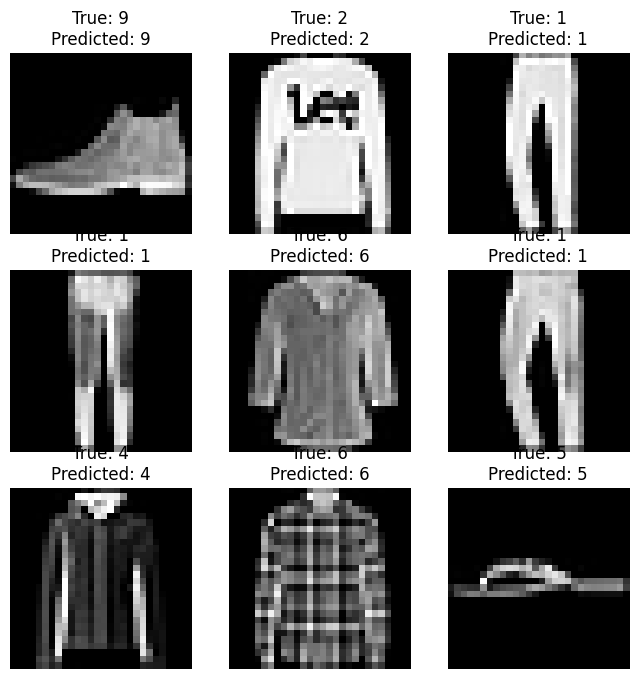

In [8]:
import torch
from torchvision import datasets, transforms

# 加载数据
batch_size = 256
train_loader, test_loader = load_data_fashion_mnist(batch_size)

# 定义模型并移动到GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = FashionMNISTModel().to(device)

# 定义损失函数和优化器
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

# 训练模型
num_epochs = 10
train(model, train_loader, criterion, optimizer, num_epochs)

# 评估模型
evaluate(model, test_loader)

# 进行预测并可视化结果
predict(model, test_loader)
